# A deeper look into spaCy using the Declaration of Independence of the United States
## Libraries: JSON, REQUESTS and NLP
### Student Name: Alexandra Coffin
#### GitHub Repo Link:

Topic questions are performed as they are described in the Markdown cells below. When completed all fo teh cells have all been run, the completed project must be committed to github. The following link is the document being utilized: https://www.archives.gov/founding-docs/declaration-transcript

This assigment includes additional files that are included in the repository.

# 1. Load & Test Needed Modules:
Please check The installation list as included in the "Installations.ipynb". The command has been left below blank, please see the results run in the Installations NoteBook.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed')


Package                  Version
------------------------ --------
anyio                    3.7.0
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asgiref                  3.7.2
asttokens                2.2.1
attrs                    23.1.0
backcall                 0.2.0
beautifulsoup4           4.12.2
black                    23.7.0
bleach                   6.0.0
blis                     0.7.9
bokeh                    3.2.1
branca                   0.6.0
catalogue                2.0.8
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       3.1.0
click                    8.1.6
colorama                 0.4.6
colorcet                 3.0.1
comm                     0.1.4
confection               0.1.0
contextvars              2.4
contourpy                1.1.0
cycler                   0.11.0
cymem                    2.0.7
debugpy                  1.6.6
decorator                5

# 2. Importing Document & Saving a copy of The Declaration of Independence as a Pickle:

In [2]:
import requests

import pickle
import io
import spacy
from contextlib import redirect_stdout

url = "https://www.archives.gov/founding-docs/declaration-transcript"

response = requests.get(url)
print(response.status_code)
print(response.headers['content-type'])

# Check if request worked and pickle
try:
    #fetch html content from url
    response = requests.get(url)
    if response.status_code == 200:
        DeclarIndep_html = response.text

        with open("DeclarIndep.pkl", "wb") as file:
            pickle.dump(DeclarIndep_html, file)
        print("Article html saved to 'DeclarIndep_html.pkl' succesfully. Boston Tea Party is a GO!")
    else:
        print(f" Failed to fetch the URL. Status code: {response.status_code}")
except requests.RequestException as e:
    print(f"Error while fetching url: {e}")

200
text/html; charset=utf-8
Article html saved to 'DeclarIndep_html.pkl' succesfully. Boston Tea Party is a GO!


# 3. Read the Pickle and Print the Test:

In [3]:
import pickle
from bs4 import BeautifulSoup

try:
    with open("DeclarIndep.pkl", "rb") as file:
        DeclarIndep_html = pickle.load(file)
    
    soup = BeautifulSoup(DeclarIndep_html, "html.parser")

    DeclarIndep_text = soup.get_text()
    print(DeclarIndep_text)

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Run the code from Q1")
except Exception as e:
    print(f"Error occured: {e}")



























Declaration of Independence: A Transcription | National Archives



























Top

Skip to main content






The U.S. National Archives Home
Menu



Blogs ·
        
Bookmark/Share ·

        
Contact Us



Search


Search








 

Main menuResearch Our Records
Veterans' Service Records
Educator Resources
Visit Us
America's Founding Documents
 



America's Founding Documents

Home > America's Founding Documents > Declaration of Independence Transcript            





America's Founding Documents

Main Page

Explore the Documents

Declaration of Independence
Constitution of the United States
Bill of Rights


Special Features

High Resolution Downloads
Sign the Declaration or Constitution
The Faulkner Murals
Meet the Framers of the Constitution

Other Resources

Visit the National Archives Museum
View Other Milestone Documents
Browse Teaching Resources for the Revolutionary Era
Civics for All of US
Explore Online Exhibits
Search the National A

# 4. Creating the doc object & Tokenizing:
In this instance tokenizing the text will be the best method to determine if an NLP has the ability to analyize the document. NLPs are trained mainly on modern English, which when compared to English as spoken and written in 1770s is radically different. Many words, phrases and gramatical elements have changed over the past 248 years since its inital draft in 1775 by Thomas Jefferson. Especially when the final draft whichw as adopted in 1776 had been reviewed by both John Addams and Benjamin Franklin before arriving at the Committe of Five and finally delivered to Congress.

As Punctuation will be an issue we will imedialy pull all the tokens associated with puncutation out of this stage. 

In [4]:
import pickle
from nltk.tokenize import word_tokenize
from collections import Counter

import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup


def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(DeclarIndep_text)
    stop_words = nlp.Defaults.stop_words

    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens


try:
        with open("DeclarIndep.pkl", "rb") as file:
            DeclarIndep_html = pickle.load(file)
            soup = BeautifulSoup(DeclarIndep_html, 'html.parser')
            DeclarIndep_text = soup.get_text()
            tokens = preprocess_txt(DeclarIndep_text)

            most_common_tokens = Counter(tokens).most_common(10)
            print("Ten most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency}")
except FileNotFoundError:
    print("File 'DeclarIndep.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")


Ten most frequent tokens:
declaration: 17
archives: 16
national: 11
states: 10
people: 10
independence: 9
documents: 9
laws: 9
new: 8
·: 7


# 5. Stop Words:
For this project STOP WORDS are a major issue as this is pulled from the National Archive's Website, we have to pull the words National and Archive from the list. These are not standard stop words however they will effect our analysis later. We will also add "independence" to the list as we are focused on the actual language within the document and not the title, or the other links on the page.

In [43]:
# General Stop words
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

for stop_word in list(spacy_stopwords)[:10]:
    print(stop_word)

sometimes
really
upon
n’t
never
thus
front
becoming
or
as


In [5]:
def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(DeclarIndep_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"archives", "national", "documents", "independence", "·"}
    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens


try:
        with open("DeclarIndep.pkl", "rb") as file:
            DeclarIndep_html = pickle.load(file)
            soup = BeautifulSoup(DeclarIndep_html, 'html.parser')
            DeclarIndep_text = soup.get_text()
            tokens = preprocess_txt(DeclarIndep_text)

            most_common_tokens = Counter(tokens).most_common(5)
            print("Five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency}")
except FileNotFoundError:
    print("File 'DeclarIndep.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")

Five most frequent tokens:
declaration: 17
states: 10
people: 10
laws: 9
new: 8


# 6. Sentence Detection:
Every document has basic features, in this instace we are interested in the following:

    * 6.1: Number of Sentences in the Document
    * 6.2: Locating the first word in sentences


In [35]:
# 6.1 Number of Sentences:
import pickle
import nltk

from nltk.tokenize import sent_tokenize


with open('DeclarIndep.pkl', 'rb') as f:
    doc = pickle.load(f)

sentences = sent_tokenize(doc)

num_sentences = len(sentences)

print(f"There are {num_sentences} in the Declaration total.")



There are 33 in the Declaration total.


In [36]:
# 6.2 Doc Process Text
nlp = spacy.load("en_core_web_sm")
DeclarIndep_doc = nlp(DeclarIndep_text)
print([token.text for token in DeclarIndep_doc])

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Declaration', 'of', 'Independence', ':', 'A', 'Transcription', '|', 'National', 'Archives', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Top', '\n\n', 'Skip', 'to', 'main', 'content', '\n\n\n\n\n\n\n', 'The', 'U.S.', 'National', 'Archives', 'Home', '\n', 'Menu', '\n\n\n\n', 'Blogs', '·', '\n        \n', 'Bookmark', '/', 'Share', '·', '\n\n        \n', 'Contact', 'Us', '\n\n\n\n', 'Search', '\n\n\n', 'Search', '\n\n\n\n\n\n\n\n\n \n\n', 'Main', 'menuResearch', 'Our', 'Records', '\n', 'Veterans', "'", 'Service', 'Records', '\n', 'Educator', 'Resources', '\n', 'Visit', 'Us', '\n', 'America', "'s", 'Founding', 'Documents', '\n \n\n\n\n', 'America', "'s", 'Founding', 'Documents', '\n\n', 'Home', '>', 'America', "'s", 'Founding', 'Documents', '>', 'Declaration', 'of', 'Independence', 'Transcript', '           \n\n\n\n\n\n', 'America', "'s", 'Founding', 'Documents', '\n\n', 'Main', 'Page', '\n\n', 'Explore', 'the', 'Doc

In [40]:
# 6.3 Index Positions of Tokens
import spacy
nlp = spacy.load("en_core_web_sm")
DeclarIndep_doc = nlp(DeclarIndep_text)
for token in DeclarIndep_doc:
    print(token, token.idx)



























 0
Declaration 26
of 38
Independence 41
: 53
A 55
Transcription 57
| 71
National 73
Archives 82




























 90
Top 118


 121
Skip 123
to 128
main 131
content 136







 143
The 150
U.S. 154
National 159
Archives 168
Home 177

 181
Menu 182




 186
Blogs 190
· 196

        
 197
Bookmark 207
/ 215
Share 216
· 222


        
 223
Contact 234
Us 242




 244
Search 248



 254
Search 257









 

 263
Main 275
menuResearch 280
Our 293
Records 297

 304
Veterans 305
' 313
Service 315
Records 323

 330
Educator 331
Resources 340

 349
Visit 350
Us 356

 358
America 359
's 366
Founding 369
Documents 378

 



 387
America 393
's 400
Founding 403
Documents 412


 421
Home 423
> 428
America 430
's 437
Founding 440
Documents 449
> 459
Declaration 461
of 473
Independence 476
Transcript 489
           





 500
America 517
's 524
Founding 527
Documents 536


 545
Main 547
Page 552


 556
Explore 558
the 566
Documents 570


 579
Declaration 581
of 

# 7. Attributes for Token Class
For this particular section I did not apply the removal of stop words because I wanted to see what was considered a stop word according to spaCy. The first part(7.1) I will evaluate the actual index of the words according to spaCy. I have already addressed Stop_words earlier in the method as well as the removal of punctuation.

In [58]:

print(
    f"{'Text with Whitespace':22}"
    f"{'Is Alphanumeric?':15}"
    f"{'Is Punctuation?':18}"
    f"{'Is Stop Word?'}")
for interesting_tokens in DeclarIndep_doc: 
    print(
        f"{str(interesting_tokens.text_with_ws).strip():22}"
        f"{str(interesting_tokens.is_alpha).strip():15}"
        f"{str(interesting_tokens.is_punct).strip():18}"
        f"{str(interesting_tokens.is_stop).strip()}"
        )

Text with Whitespace  Is Alphanumeric?Is Punctuation?   Is Stop Word?
                      False          False             False
Declaration           True           False             False
of                    True           False             True
Independence          True           False             True
:                     False          True              False
A                     True           False             True
Transcription         True           False             False
|                     False          False             False
National              True           False             True
Archives              True           False             True
                      False          False             False
Top                   True           False             True
                      False          False             False
Skip                  True           False             False
to                    True           False             True
main                  

# 8. Sentiment Analysis using Tokenization:
Every form of sentiment analysis is different, so creating an analysis based on tokenizing allows for us to focus on the indiividual words but not the actual position of the word in a sentence or function of the word.

Score of the first sentence using tokens: 66.53333333333333


<function matplotlib.pyplot.show(close=None, block=None)>

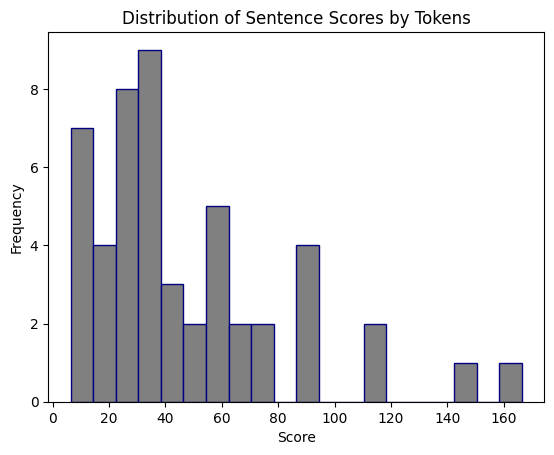

In [73]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup
def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(DeclarIndep_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"archives", "national", "documents", "independence", "·"}
    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens

def score_sentence_by_token(sentence, interesting_token):
    words = sentence.lower().split()
    num_words = len(words)
    num_interesting = len(interesting_tokens)
    return num_interesting / num_words

# Test the scoring functions using first sentence
first_sentence = DeclarIndep_text.split(".")[0]
print("Score of the first sentence using tokens:", score_sentence_by_token(first_sentence, interesting_tokens))

# Applying to the whole document through the form of sentences:

import matplotlib.pyplot as plt

sentences = [sent.text for sent in doc.sents]

# Adding interesting tokens and scores
def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(DeclarIndep_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"archives", "national", "documents", "independence", "·"}
    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    
    return interesting_tokens

interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
plt.hist(scores_by_tokens, bins=20, color='grey', edgecolor="navy")
plt.title("Distribution of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show


# 9. Lemmatization:
Lemmatization is the process of reducing inflected forms of a word. This allows for us to investigate the root word which is known as a lemma. While Tokenizing examines the words as a single piece, lemmatization is the process in which we examine the roots. In theory this form of analysis will be more benificial as the evelution of modern American English is based on older lemma, the only difference being the role in which these words play. This Analysis will be slightly longer as Postcolonial Expension of English into the Modern Era evolved greatly when compared to the root of Colonial English. 

Parts:
    * 9.1: Lemmatization Process
    * 9.2: Word Frequency Using Lemmas
    * 9.3: Speech Tagging Nouns, verbs, adjectives and interjection
    * 9.4: Sentiment Analysis